### Corrupting collected data 

We artificially corrupt labels from a dataset and display how it affects the labeled frames. Then we look for frames that have abnormal distances between bodyparts (for example snout and tail).

In [56]:
# importing libraries used in this book
import pandas as pd
import numpy as np
import shutil
import deeplabcut
import random
import re
from IPython.display import Image, display

In [57]:
# I still have errors when I try to change the data like this.
'''
# copying correct labeled data into a new file
original = r'openfield-Pranav-2018-08-20\labeled-data-correct\m1s1\CollectedData_Pranav.csv'
target = r'openfield-Pranav-2018-08-20\labeled-data\m1s1\CollectedData_Pranav.csv'
shutil.copyfile(original, target)

df = pd.read_csv(r'openfield-Pranav-2018-08-20\labeled-data\m1s1\CollectedData_Pranav.csv')

columns = df.columns.tolist()
columns.pop(0)

filename = df.loc[:,"scorer"].tolist()
filename.pop(0);filename.pop(0)

random.shuffle(filename)

# we corrupt 10 labels out of the 115 (number can be changed) 
for name in filename[:10]:
    string = "".join(re.findall(r'\d',name))
    id = int(string[2:])
    for column in columns:
        df.iloc[id][column] = np.random.uniform(5,500)


df.to_csv(r'openfield-Pranav-2018-08-20\labeled-data\m1s1\CollectedData_Pranav.csv')
df.to_hdf(r'openfield-Pranav-2018-08-20\labeled-data\m1s1\CollectedData_Pranav.h5','',format="table",mode="w")
'''

'\n# copying correct labeled data into a new file\noriginal = r\'openfield-Pranav-2018-08-20\\labeled-data-correct\\m1s1\\CollectedData_Pranav.csv\'\ntarget = r\'openfield-Pranav-2018-08-20\\labeled-data\\m1s1\\CollectedData_Pranav.csv\'\nshutil.copyfile(original, target)\n\ndf = pd.read_csv(r\'openfield-Pranav-2018-08-20\\labeled-data\\m1s1\\CollectedData_Pranav.csv\')\n\ncolumns = df.columns.tolist()\ncolumns.pop(0)\n\nfilename = df.loc[:,"scorer"].tolist()\nfilename.pop(0);filename.pop(0)\n\nrandom.shuffle(filename)\n\n# we corrupt 10 labels out of the 115 (number can be changed) \nfor name in filename[:10]:\n    string = "".join(re.findall(r\'\\d\',name))\n    id = int(string[2:])\n    for column in columns:\n        df.iloc[id][column] = np.random.uniform(5,500)\n\n\ndf.to_csv(r\'openfield-Pranav-2018-08-20\\labeled-data\\m1s1\\CollectedData_Pranav.csv\')\ndf.to_hdf(r\'openfield-Pranav-2018-08-20\\labeled-data\\m1s1\\CollectedData_Pranav.h5\',\'\',format="table",mode="w")\n'

In [58]:
# I ended up changing manually the labels since I could not do it like I was trying to do.
# changing snout or tail labeling (images: 0,5,10,15,20,25,30,35,40)
# swapping left and right ear labels (images: 70,80,90,100)

df = pd.read_csv(r'openfield-Pranav-2018-08-20\labeled-data\m1s1\CollectedData_Pranav.csv')
df.to_hdf(r'openfield-Pranav-2018-08-20\labeled-data\m1s1\CollectedData_Pranav.h5','',format="table",mode="w")
# the df.to_hdf gives an error but the .h5 is needed to check the labels so I don't know what is wrong here

# check corrupted labels
deeplabcut.check_labels(r'openfield-Pranav-2018-08-20\config.yaml')

NodeError: the root node can not be removed

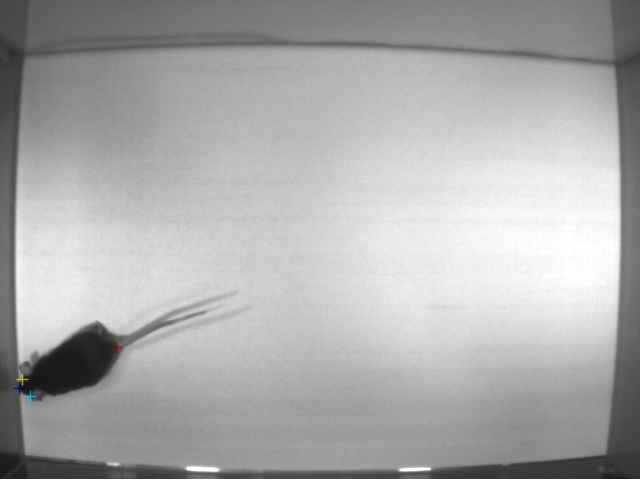

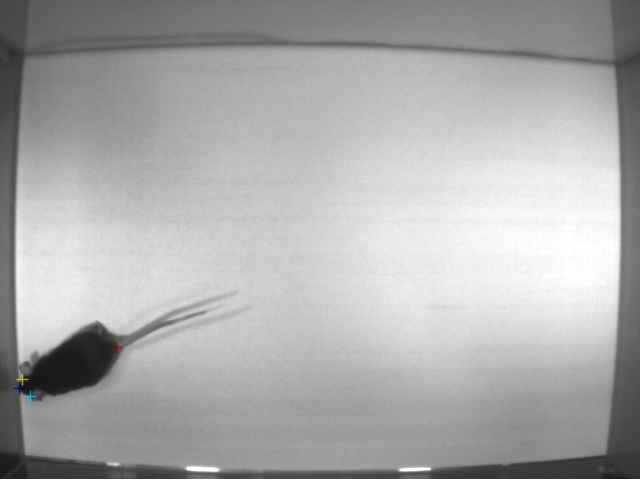

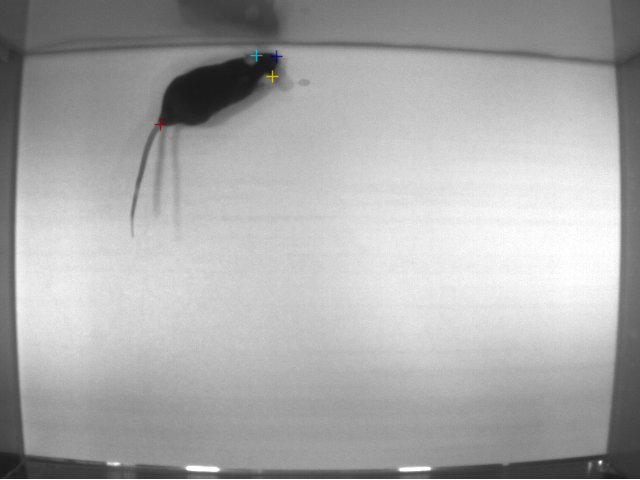

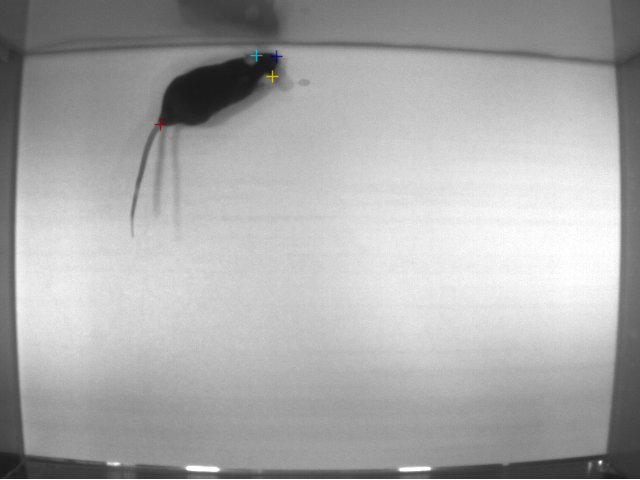

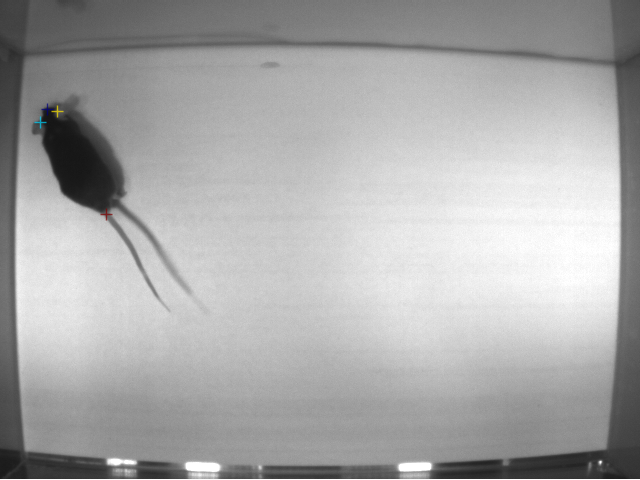

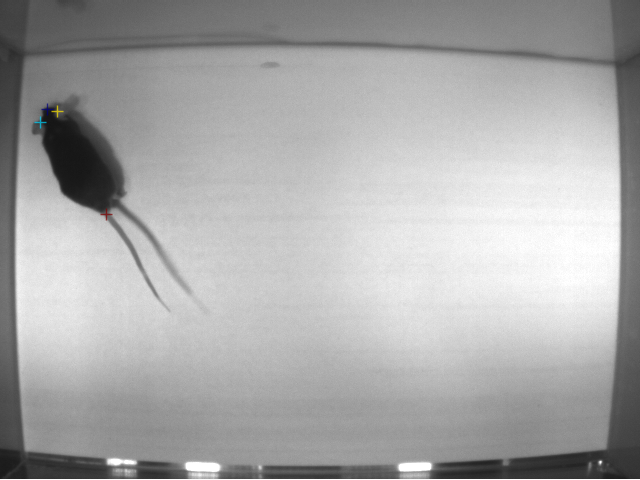

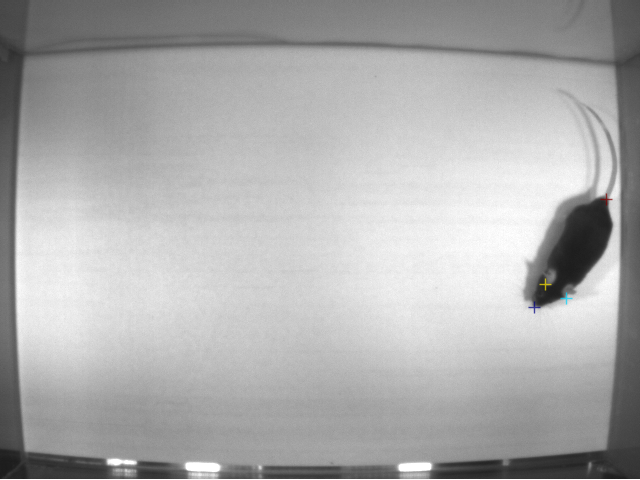

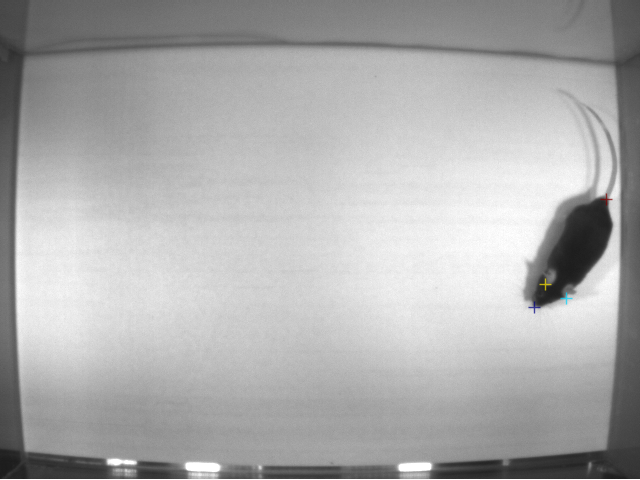

In [51]:
# display correct and corrupted labeled frames
# we only show a couple of images

display(Image(filename='openfield-Pranav-2018-08-20/labeled-data-correct/m1s1_labeled/img0000_bodypart.png'))
display(Image(filename='openfield-Pranav-2018-08-20/labeled-data/m1s1_labeled/img0000_bodypart.png'))
display(Image(filename='openfield-Pranav-2018-08-20/labeled-data-correct/m1s1_labeled/img0015_bodypart.png'))
display(Image(filename='openfield-Pranav-2018-08-20/labeled-data/m1s1_labeled/img0015_bodypart.png'))

display(Image(filename='openfield-Pranav-2018-08-20/labeled-data-correct/m1s1_labeled/img0070_bodypart.png'))
display(Image(filename='openfield-Pranav-2018-08-20/labeled-data/m1s1_labeled/img0070_bodypart.png'))
display(Image(filename='openfield-Pranav-2018-08-20/labeled-data-correct/m1s1_labeled/img0080_bodypart.png'))
display(Image(filename='openfield-Pranav-2018-08-20/labeled-data/m1s1_labeled/img0080_bodypart.png'))

In [55]:
# look for frames that have abnormal distances between bodyparts (here snout and tail)
treshold = 100
df = pd.read_hdf(r'openfield-Pranav-2018-08-20\labeled-data\m1s1\CollectedData_Pranav.h5',key='')
snout = df.xs('snout', level='bodyparts', axis=1).to_numpy()
tail = df.xs('tail', level='bodyparts', axis=1).to_numpy()
diff = (snout-tail).reshape(len(df), -1, 2)
dist = np.linalg.norm(diff, axis=2)
mask = np.any(dist >= treshold, axis=1)
abnormalFrames = df.iloc[mask].index
print(abnormalFrames)

"\n# look for frames that have abnormal distances between bodyparts (here snout and tail)\ntreshold = 100\ndf = pd.read_hdf(r'openfield-Pranav-2018-08-20\\labeled-data\\m1s1\\CollectedData_Pranav.h5',key='')\nsnout = df.xs('snout', level='bodyparts', axis=1).to_numpy()\ntail = df.xs('tail', level='bodyparts', axis=1).to_numpy()\ndiff = (snout-tail).reshape(len(df), -1, 2)\ndist = np.linalg.norm(diff, axis=2)\nmask = np.any(dist >= treshold, axis=1)\nabnormalFrames = df.iloc[mask].index\nprint(abnormalFrames)\n"

In [65]:
# look for frames where bodyparts (like right and left ear) might have been swapped
df = pd.read_hdf(r'openfield-Pranav-2018-08-20\labeled-data\m1s1\CollectedData_Pranav.h5',key='')
rightear = df.xs('rightear', level='bodyparts', axis=1).to_numpy()
leftear = df.xs('leftear', level='bodyparts', axis=1).to_numpy()

# calculate the angle 

TypeError: cannot create a storer if the object is not existing nor a value are passed